# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

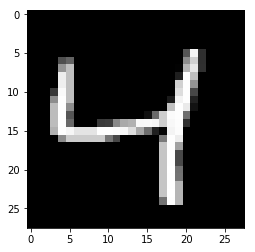

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, [None, image_size], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, image_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6915
Epoch: 1/20... Training loss: 0.6882
Epoch: 1/20... Training loss: 0.6842
Epoch: 1/20... Training loss: 0.6802
Epoch: 1/20... Training loss: 0.6754
Epoch: 1/20... Training loss: 0.6696
Epoch: 1/20... Training loss: 0.6610
Epoch: 1/20... Training loss: 0.6523
Epoch: 1/20... Training loss: 0.6424
Epoch: 1/20... Training loss: 0.6316
Epoch: 1/20... Training loss: 0.6169
Epoch: 1/20... Training loss: 0.6041
Epoch: 1/20... Training loss: 0.5877
Epoch: 1/20... Training loss: 0.5732
Epoch: 1/20... Training loss: 0.5539
Epoch: 1/20... Training loss: 0.5370
Epoch: 1/20... Training loss: 0.5239
Epoch: 1/20... Training loss: 0.5004
Epoch: 1/20... Training loss: 0.4824
Epoch: 1/20... Training loss: 0.4674
Epoch: 1/20... Training loss: 0.4517
Epoch: 1/20... Training loss: 0.4333
Epoch: 1/20... Training loss: 0.4183
Epoch: 1/20... Training loss: 0.4023
Epoch: 1/20... Training loss: 0.3879
Epoch: 1/20... Training loss: 0.3769
E

Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1808
Epoch: 1/20... Training loss: 0.2015
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1848
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1835
E

Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1543
E

Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1427
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1350
E

Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1273
E

Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1100
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1113
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1106
E

Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1115
E

Epoch: 6/20... Training loss: 0.0982
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1010
E

Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1105
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1062
E

Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0994
E

Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0968
E

Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0927
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0950
E

Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0883
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0890
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0989
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0878
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0992
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0887
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0981
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0894
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0977
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0875
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

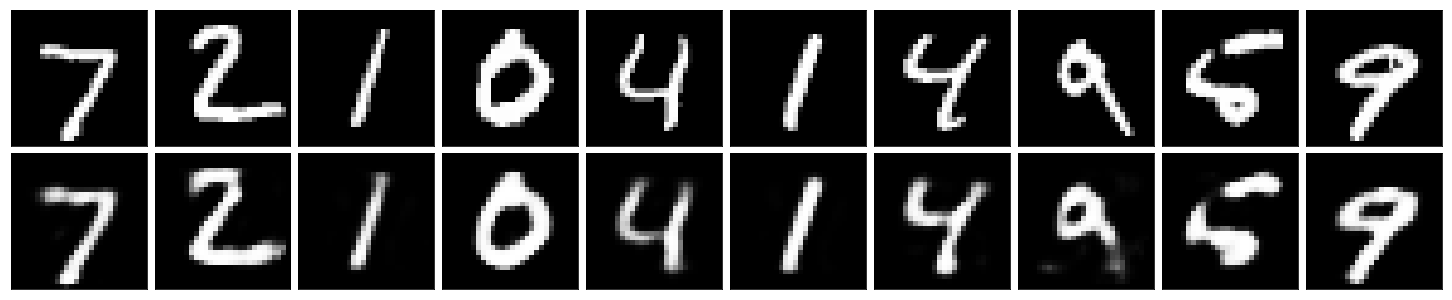

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.